### Data Visualization Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Setup
##importing population data files for 5 countries of choice into 5 data frames: australia, bolivia, mexico, denmark, finland
df_aus = pd.read_csv('ddf--datapoints--population--by--country-aus--age--gender--year.csv')
df_bol = pd.read_csv('ddf--datapoints--population--by--country-bol--age--gender--year.csv')
df_mex = pd.read_csv('ddf--datapoints--population--by--country-mex--age--gender--year.csv')
df_dnk = pd.read_csv('ddf--datapoints--population--by--country-dnk--age--gender--year.csv')
df_fin = pd.read_csv('ddf--datapoints--population--by--country-fin--age--gender--year.csv')
#dictionary of country data frames
data_ddf = {'australia':df_aus, 'bolivia':df_bol, 'mexico':df_mex, 'denmark':df_dnk, 'finland':df_fin}
#combined data frame containining data for all countries
all_df = [df_aus, df_bol, df_mex, df_dnk, df_fin]
df_total = pd.concat(all_df)

## Part 1: MatPlotlib
### Line Plot

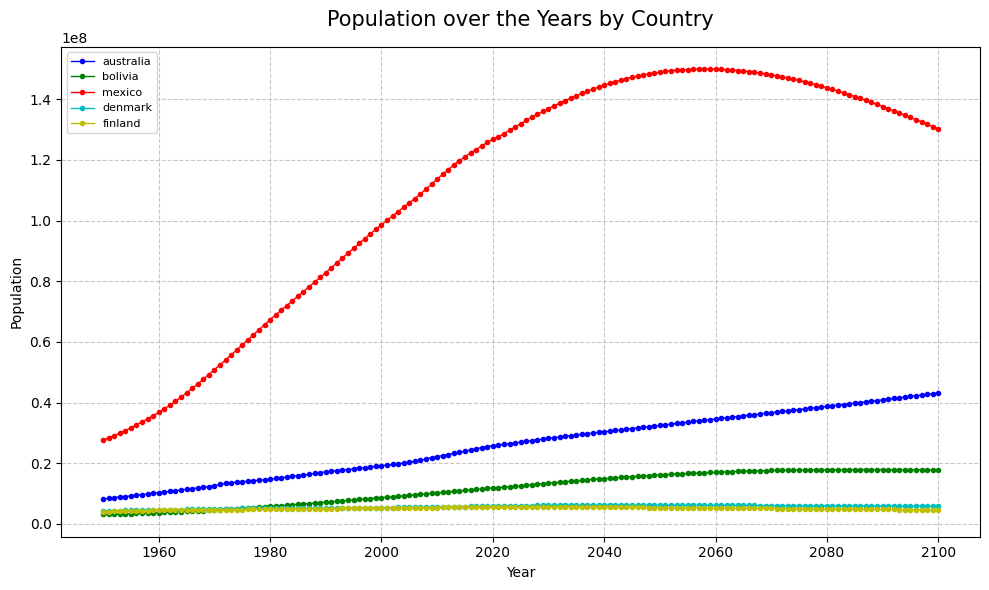

In [ ]:
#grouping population total by year by country
year_total_aus = df_aus.groupby('year')['population'].sum().reset_index()
year_total_bol = df_bol.groupby('year')['population'].sum().reset_index()
year_total_mex = df_mex.groupby('year')['population'].sum().reset_index()
year_total_dnk = df_dnk.groupby('year')['population'].sum().reset_index()
year_total_fin = df_fin.groupby('year')['population'].sum().reset_index()
year_total_all = [year_total_aus, year_total_bol, year_total_mex, year_total_dnk, year_total_fin]
df_year_total = pd.concat(year_total_all)
#setting the figure size for the line plot
plt.figure(figsize=(10, 6))
#using matplotlib plot() function to plot yearly total population by year for each of the 5 countries
plt.plot(year_total_aus['year'], year_total_aus['population'], 
         marker='o', linestyle='-', color='blue', 
         linewidth=1, markersize=3, label='australia')
plt.plot(year_total_bol['year'], year_total_bol['population'], 
         marker='o', linestyle='-', color='g', 
         linewidth=1, markersize=3, label='bolivia')
plt.plot(year_total_mex['year'], year_total_mex['population'], 
         marker='o', linestyle='-', color='r', 
         linewidth=1, markersize=3, label='mexico')
plt.plot(year_total_dnk['year'], year_total_dnk['population'], 
         marker='o', linestyle='-', color='c', 
         linewidth=1, markersize=3, label='denmark')
plt.plot(year_total_fin['year'], year_total_fin['population'], 
         marker='o', linestyle='-', color='y', 
         linewidth=1, markersize=3, label='finland')
#formatting the line plot with title, axes labels, legend
plt.title('Population over the Years by Country', fontsize=15, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Population', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

### Stacked Bar Chart

/tmp/ipykernel_21396/976669162.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = years_toplot[['year', 'bin', 'population']].groupby(['year', 'bin']).sum().unstack()


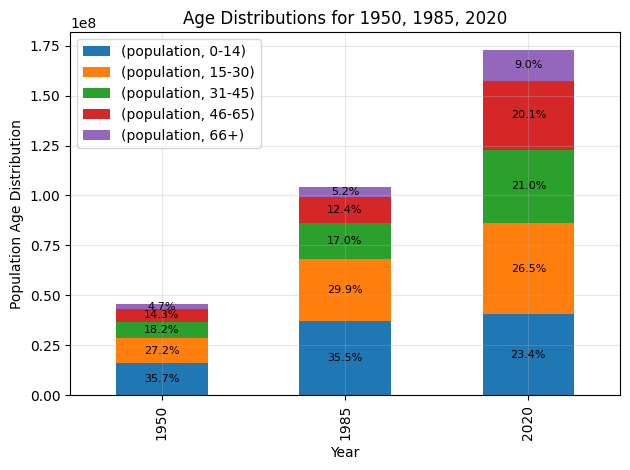

In [ ]:
#grouping the age variable into bins, setting the bin labels as our age groups of interest
bins = [0, 14, 30, 45, 65, 100]
bin_labels = ['0-14', '15-30', '31-45', '46-65', '66+']
#using pd.cut() function to convert the continuous, numeric variable age into a categorical variable with distinct bins for bar chart
df_total['bin'] = pd.cut(df_total['age'], bins, labels = bin_labels)
age_group = df_total[df_total['bin'].isin(['0-14', '15-30', '31-45', '46-65', '66+'])]
#only including years that are one of our 3 specific years of interest: 1950, 1985, or 2020
years_toplot = df_total[df_total['year'].isin([1950, 1985, 2020])]
data = years_toplot[['year', 'bin', 'population']].groupby(['year', 'bin']).sum().unstack()
#plotting a stacked bar chart
ax_stacked = data.plot(kind='bar', stacked= True)
#adding percentages to the stacked bar chart
##calculating the percent for each age category
data_percent = data.div(data.sum(axis = 1), axis=0) * 100
#looping through rows & columns of 'data' to compute height of each bar segment and annotate the segments
for i in range(len(data)):
    #total height variable in order to keep track of the full height of each bar separately
    total_bar_hgt = 0
    for j in range(len(data.columns)):
        #variable for the height of one segment of the bar we are currently on
        seg_height = data.iloc[i,j]
        total_bar_hgt += seg_height
        percent = data_percent.iloc[i,j]
        #annotating the percentage onto the chart, ensuring the number is placed in the center of each segment
        ax_stacked.text(i, total_bar_hgt - (seg_height/2), f'{percent:.1f}%', ha='center', va = 'center', fontsize = 8)
#formatting the stacked bar chart
plt.title('Age Distributions for 1950, 1985, 2020')
plt.xlabel('Year')
plt.ylabel('Population Age Distribution')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



## Part 2: Seaborn
### Heatmap

/tmp/ipykernel_2516/1745356827.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_toplot = data_toplot.pivot_table(index = "country", columns = "bin", values = "population")


Text(0.5, 1.0, 'Heatmap of Population Age Distributions by Country in 2020')

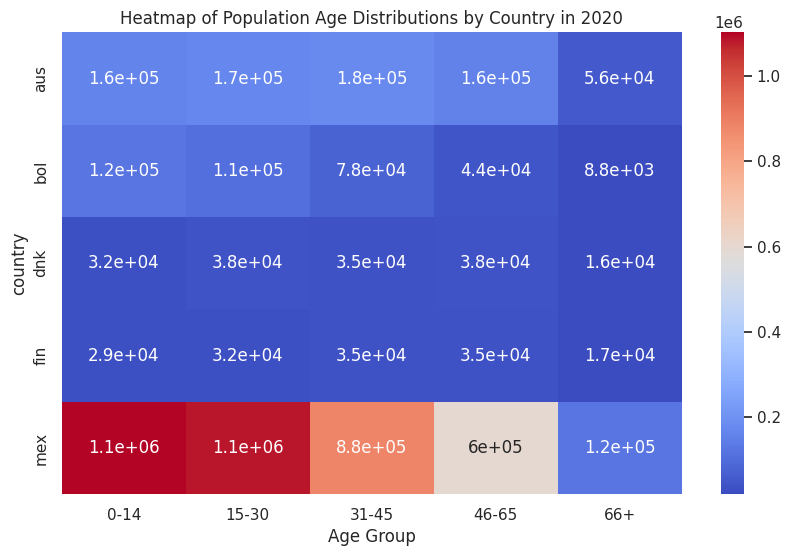

In [5]:
sns.set_theme(style="whitegrid", rc={"figure.figsize": (10, 6)})
#creating bins to categorize the age variable into categorical groups
bins = [0, 14, 30, 45, 65, 100]
bin_labels = ['0-14', '15-30', '31-45', '46-65', '66+']
#creating age_group to have ages in discrete categories, same as in Part 1
age_group = df_total[df_total['bin'].isin(['0-14', '15-30', '31-45', '46-65', '66+'])]
data_toplot = age_group[age_group['year']==2020]
data_toplot = data_toplot.pivot_table(index = "country", columns = "bin", values = "population")

ax = sns.heatmap(data = data_toplot, annot=True, cmap='coolwarm', vmin=20000)
ax.set_xlabel('Age Group')
ax.set_title('Heatmap of Population Age Distributions by Country in 2020')

#### Heatmap Summary
-The heatmap shows us that the greatest population density is occurring in the younger age groups in Mexico, while the lowest population density is occurring in the older (66+) age groups in Finland, Bolivia, and Denmark

### 2. Violin Plots

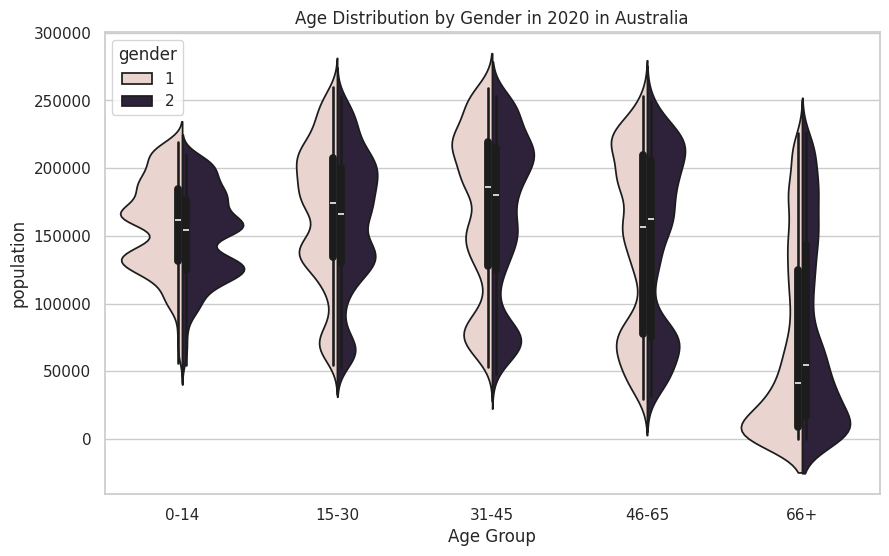

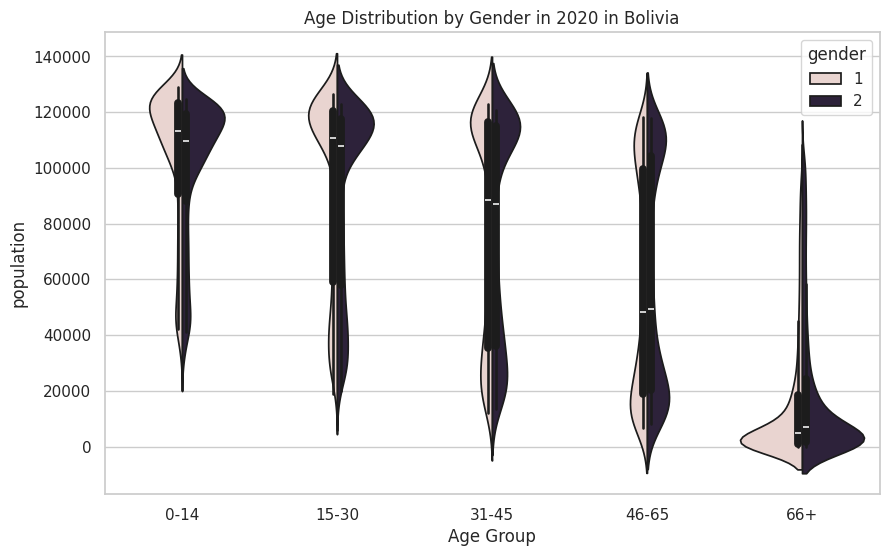

In [6]:
#creating bins to categorize the age variable
bins = [0, 14, 30, 45, 65, 100]
bin_labels = ['0-14', '15-30', '31-45', '46-65', '66+']
df_aus['bin'] = pd.cut(df_aus['age'], bins, labels = bin_labels)
df_bol['bin'] = pd.cut(df_bol['age'], bins, labels = bin_labels)


plt.figure(figsize=(10,6))
ax1 = sns.violinplot(data=df_aus, x= 'bin', y= 'population', hue= 'gender', split=True)
ax1.set_title("Age Distribution by Gender in 2020 in Australia")
ax1.set_xlabel("Age Group")
plt.show()
plt.figure(figsize=(10,6))
ax2 = sns.violinplot(data=df_bol, x= 'bin', y= 'population', hue = 'gender', split=True)
ax2.set_title("Age Distribution by Gender in 2020 in Bolivia")
ax2.set_xlabel("Age Group")
plt.show()

#### Violin Plot Summary
- The population has greater spread in both Aus and Bol in the older age group: 66+
- Bolivia also seems to have more indivdiuals in younger age groups, 0-14 and 15-30, than Australia
- The population of Bolivia also seems to have a greater proportion of males than Australia, which seems more balanced with respect to gender proportions

### 3. Pairplot

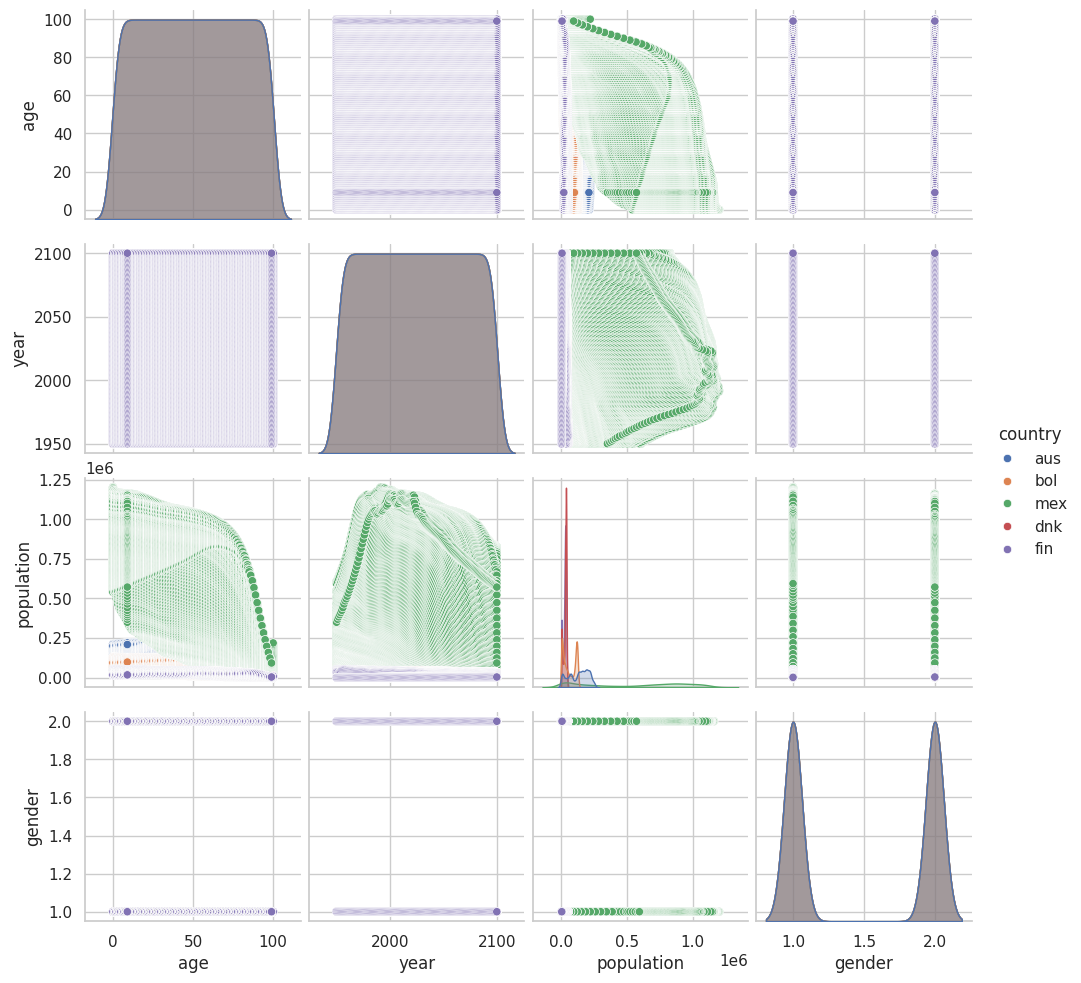

In [7]:
sns.pairplot(df_total, 
             vars=['age', 'year', 'population', 'gender'],
             hue='country',
             diag_kind='kde')

#### Pairplot Summary
- Gender was recorded as binary and appears as a binary variable on this pairplot, we see 2 distinct lines representing both gender when gender is plotted with respect to age, year, and population.
- The population of mexico is much larger and has a younger population than the other countries. We also see much more rapid population growth in mexico before the year 2000 than other countries